## Logistic Regression : 2진 분류(Binary Classification)
: 2진 분류의 활성화 함수로는 sigmoid가 사용됨

### sigmoid 함수
#### sigmoid : 2진 분류(Binary Classification,Logistic Regression) 모델의  활성화 함수(Activation Function)

In [3]:
import math
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1./(1. + math.e**-z)

print(math.e) # 2.718281828459045

print(sigmoid(-100)) # 0에 수렴
print(sigmoid(-10))
print(sigmoid(0))    # 0.5
print(sigmoid(10))
print(sigmoid(100))  # 1에 수렴

2.718281828459045
3.7200759760208555e-44
4.539786870243442e-05
0.5
0.9999546021312976
1.0


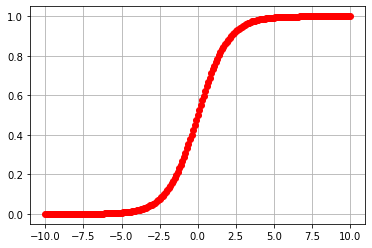

In [5]:
# 시각화
x,y = [],[]
for k in range(-100,101):
    n = sigmoid(k/10)
    
    x.append(k/10)
    y.append(n)
    
plt.plot(x,y,'ro')  
plt.grid(True)
plt.show()

In [6]:
# Logistic Regression : 2진 분류(Binary Classification)¶
import tensorflow as tf
import numpy as np
tf.random.set_seed(5)

In [7]:
# x_data : [6,2]
x_data = [[1,2],
          [2,3],
          [3,1],
          [4,3],
          [5,3],
          [6,2]]

# y_data : [6,1]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]
x_train = np.array(x_data,dtype=np.float32)
y_train = np.array(y_data,dtype=np.float32)

In [8]:
# 변수 초기화 : weight, bias
# (m,n) * (n,l) = (m,l)   : 행렬의 내적 곱셈 공식
# (6,2) * (2,1) = (6,1)
W = tf.Variable(tf.random.normal([2,1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

In [9]:
# 예측 함수(hypothesis) : H(X) = sigmoid(X*W + b)
# tf.sigmoid() : tf.div(1.,1. + tf.exp(-(tf.matmul(X,W) + b)))
def hypothesis(X):
    return tf.sigmoid(tf.matmul(X,W) + b)   # 0과 1사이의 값이 출력

In [10]:
# 비용함수 : logloss, 2진 분류 모델
def cost_func():
    # cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train)) # 회귀 모델

    cost = -tf.reduce_mean(y_train*tf.math.log(hypothesis(x_train)) + 
                          (1 - y_train)*tf.math.log(1 - hypothesis(x_train)))
    return cost

In [11]:
# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [12]:
# 학습 시작
print('****** Start Learning!!')
for step in range(10001):
    # cost를 minimize 한다
    optimizer.minimize(cost_func,var_list=[W,b]) # W,b를 업데이트
    if step % 100 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
        
print('****** Learning Finished!!') 

****** Start Learning!!
0000 cost:[ 1.661137 ]  W: [[-0.17030667]
 [-0.9402863 ]]  b: [0.23652855]
0100 cost:[ 0.588478 ]  W: [[ 0.36285377]
 [-0.5124408 ]]  b: [0.4072708]
0200 cost:[ 0.5059313 ]  W: [[ 0.53627616]
 [-0.5368375 ]]  b: [-0.18216892]
0300 cost:[ 0.4375107 ]  W: [[ 0.69217587]
 [-0.5114027 ]]  b: [-0.8036816]
0400 cost:[ 0.38093838 ]  W: [[ 0.81929266]
 [-0.44354403]]  b: [-1.4264516]
0500 cost:[ 0.332903 ]  W: [[ 0.9234858 ]
 [-0.34686092]]  b: [-2.0376947]
0600 cost:[ 0.29171243 ]  W: [[ 1.0127202 ]
 [-0.23518287]]  b: [-2.6305726]
0700 cost:[ 0.2564744 ]  W: [[ 1.0934263 ]
 [-0.11935537]]  b: [-3.2008498]
0800 cost:[ 0.22647582 ]  W: [[ 1.1698232 ]
 [-0.00650668]]  b: [-3.7462757]
0900 cost:[ 0.20100074 ]  W: [[1.2442577 ]
 [0.09951956]]  b: [-4.266259]
1000 cost:[ 0.17934632 ]  W: [[1.3178085 ]
 [0.19723554]]  b: [-4.7614303]
1100 cost:[ 0.16087212 ]  W: [[1.3908268]
 [0.2865707]]  b: [-5.2331715]
1200 cost:[ 0.14502646 ]  W: [[1.4633183]
 [0.3681636]]  b: [-5.683258

In [13]:
# Weight과 bias 출력
print('Weight:',W.numpy())
print('bias:', b.numpy())

Weight: [[6.1516347]
 [3.0542414]]
bias: [-27.77797]


In [16]:
# 정확도 측정 : accuracy computation
def predict(X):
    return tf.cast(hypothesis(X) > 0.5, dtype=tf.float32)

# 학습 데이터를 그대로 검증 데이터로 사용하여 예측한 경우
x_test = x_train
y_test = y_train

preds = predict(x_test)
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds,y_test),dtype=tf.float32))

print('Accuracy:',accuracy.numpy())
print('Hypothesis:\n',hypothesis(x_test).numpy())
print('Predict:\n',preds.numpy())

Accuracy: 1.0
Hypothesis:
 [[1.8225627e-07]
 [1.8111591e-03]
 [1.8908737e-03]
 [9.9750584e-01]
 [9.9999464e-01]
 [9.9999976e-01]]
Predict:
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [18]:
# 예측
print('***** Predict')
# x_data = [[1,2],
#           [2,3],
#           [3,1],
#           [4,3],
#           [5,3],
#           [6,2]]
x_data = [[1,1],
          [2,5],
          [3,3],
          [4,4],
          [5,2],
          [6,6]]
x_test = np.array(x_data,dtype=np.float32)
preds = predict(x_test)
print(preds.numpy())

***** Predict
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
